In [1]:
from registration_framework import Registration
from pso_optim import PSO_optim
from utils.tools import Tools

config = Tools.load_yaml_config("config.yaml")
res_path = f"{config.data_save_path}/{config.record_id}"
file_name = f"{config.record_id}_config.yaml"
Tools.save_obj_yaml(res_path, file_name, config)

registration = Registration(config)
pso = PSO_optim(config)
registration.set_optim_algorithm(pso)
result = registration.registrate()


Folder 'D:/workspace/ml-workspace/registration/result/normal/test-4-2d' already exists and the file 'test-4-2d_config.yaml' is not present.
r_width: 256, r_height: 256
Folder 'D:/workspace/ml-workspace/registration/result/normal/test-4-2d' already exists and the file 'iter0_best_reg.bmp' is not present.
iterations: 0, fitness: 0.2760188024477046, params: tensor([912.2367, 782.7768,   4.2898], dtype=torch.float64)
Folder 'D:/workspace/ml-workspace/registration/result/normal/test-4-2d' already exists and the file 'iter1_best_reg.bmp' is not present.
iterations: 1, fitness: 0.2777683274672523, params: tensor([886.1684, 882.2375,   9.9507], dtype=torch.float64)
Folder 'D:/workspace/ml-workspace/registration/result/normal/test-4-2d' already exists and the file 'iter2_best_reg.bmp' is not present.
iterations: 2, fitness: 0.28067235764526927, params: tensor([861.2358, 896.8282,   9.6961], dtype=torch.float64)
Folder 'D:/workspace/ml-workspace/registration/result/normal/test-4-2d' already exis

In [42]:
import cma,torch,os
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK']='True'

best_value = 0
res_img = None

# 定义目标函数，这里只是一个示例函数
def objective_function(x):
    global best_value
    global res_img
    x = torch.tensor(x)
    res = registration.similarity(x)
    fitness = res[0]
    if fitness > best_value:
        best_value = fitness
        res_img = res[1]
    return fitness

# 初始解猜测和标准差
# initial_solution = pso.spawn_random_particles()
# for i in range(len(initial_solution)):
#     position = initial_solution[i]
#     initial_solution[i] = position.numpy()
# initial_guess = np.array(initial_solution)

# 定义优化参数
initial_guess = np.array([700, 800, 4])  # 初始猜测解，根据问题维度调整

bounds = np.array((pso.minV, pso.maxV))

sigma0 = 1.0  # 初始标准差，表示搜索范围的大小
popsize = 128 #pso.particle_num  # 种群大小

# 初始化 CMA-ES 优化器
es = cma.CMAEvolutionStrategy(initial_guess, sigma0, {'popsize': popsize, 
                                                      'bounds':[bounds[0], bounds[1]],
                                                      'maxiter':100})

# 开始优化过程
while not es.stop():
    # 获取一组新的样本点
    solutions = es.ask()

    # lower = bounds[0]

    # solutions = np.clip(solutions, bounds[0], bounds[1])
    
    # 计算每个样本点的目标函数值
    function_values = [objective_function(solution) for solution in solutions]
    
    # 将目标函数值反馈给 CMA-ES
    es.tell(solutions, function_values)
    
    # 输出当前的状态信息（可选）
    es.logger.add()  # write data to logger

# 获取最终的最佳解
best_solution = es.result.xbest
best_fitness = es.result.fbest

print(f"Best solution found: {best_solution}")
print(f"Best fitness achieved: {best_fitness}")

KeyboardInterrupt: 

(<Axes: title={'center': 'reg_img'}>,
 Text(0.5, 1.0, 'reg_img'))

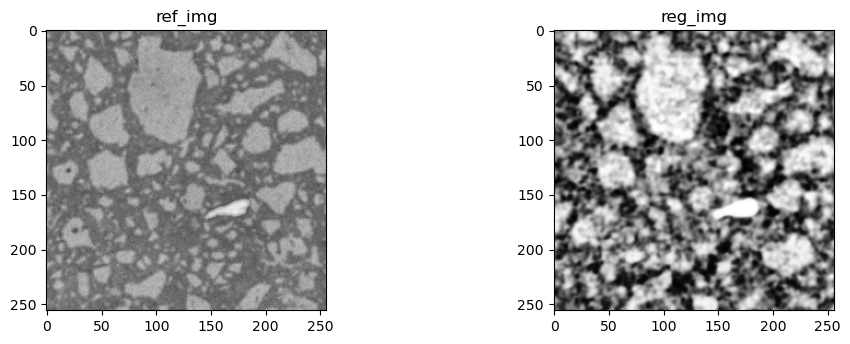

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


ref_img = registration.refered_img
reg_img = result[1]


# sp = registration.spatial_correlation(ref_img, res_img)
# print(f"spatial information: {sp}")

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(ref_img, cmap='gray', vmin=0, vmax=255), plt.title('ref_img')
plt.subplot(2, 2, 2), plt.imshow(reg_img, cmap='gray', vmin=0, vmax=255), plt.title('reg_img')


